**Sentimental Analysis of Product Reviews - Mixed Categories**

*   Training the model with mixed category product reviews
*   Testing the model for mixed category product reviews

**Importing required packages**

In [ ]:
import json
import gzip
import pandas as pd
import gensim

Download dataset from Amazon Snap


1.   Cell Phones and Accesories
2.   Electronics
3.   Digital Music
4.   Movies and TV
5.   Video Games



In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz


--2022-04-24 14:28:45--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169071325 (161M) [application/octet-stream]
Saving to: ‘Cell_Phones_and_Accessories_5.json.gz’

Cell_Phones_and_Acc 100%[===================>] 161.24M  19.0MB/s    in 9.3s    

2022-04-24 14:28:55 (17.3 MB/s) - ‘Cell_Phones_and_Accessories_5.json.gz’ saved [169071325/169071325]



In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Electronics.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Digital_Music.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Movies_and_TV.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Video_Games.json.gz

--2022-04-24 14:28:58--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Electronics.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3322874357 (3.1G) [application/octet-stream]
Saving to: ‘Electronics.json.gz’

Electronics.json.gz 100%[===================>]   3.09G  19.1MB/s    in 2m 47s  

2022-04-24 14:31:45 (19.0 MB/s) - ‘Electronics.json.gz’ saved [3322874357/3322874357]

--2022-04-24 14:31:45--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Digital_Music.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217117182 (207M) [application/octet-stream]
Saving to: ‘Digital_Music.json.gz’

Digital_Music.json. 100%[===================>] 207.06M  18.9MB/s   


**Retrieve 1 lakh records from 5 domains(20k from each) and making balanced dataset**

10k positive and 10k negative samples from each review category

In [ ]:
reviews = []
sentiment = []
p=0
ng=0
emp=0
with gzip.open("/content/Cell_Phones_and_Accessories_5.json.gz") as f:
    for l in f:
      if p==10000 and ng==10000:
        break
      d=json.loads(l.strip())
      r=d.get("reviewText","")
      if r=="":
        emp+=1
        continue
      rating=int(d.get('overall'))
      if rating>=3 and p<10000:
        sentiment.append(1)
        reviews.append(r)
        p+=1
      elif rating<3 and ng<10000:
        sentiment.append(0)
        reviews.append(r)
        ng+=1
p=0
ng=0
emp=0
with gzip.open("/content/Electronics.json.gz") as f:
    for l in f:
      if p==10000 and ng==10000:
        break
      d=json.loads(l.strip())
      r=d.get("reviewText","")
      if r=="":
        emp+=1
        continue
      rating=int(d.get('overall'))
      if rating>=3 and p<10000:
        sentiment.append(1)
        reviews.append(r)
        p+=1
      elif rating<3 and ng<10000:
        sentiment.append(0)
        reviews.append(r)
        ng+=1
p=0
ng=0
emp=0
with gzip.open("/content/Digital_Music.json.gz") as f:
    for l in f:
      if p==10000 and ng==10000:
        break
      d=json.loads(l.strip())
      r=d.get("reviewText","")
      if r=="":
        emp+=1
        continue
      rating=int(d.get('overall'))
      if rating>=3 and p<10000:
        sentiment.append(1)
        reviews.append(r)
        p+=1
      elif rating<3 and ng<10000:
        sentiment.append(0)
        reviews.append(r)
        ng+=1
p=0
ng=0
emp=0
with gzip.open("/content/Movies_and_TV.json.gz") as f:
    for l in f:
      if p==10000 and ng==10000:
        break
      d=json.loads(l.strip())
      r=d.get("reviewText","")
      if r=="":
        emp+=1
        continue
      rating=int(d.get('overall'))
      if rating>=3 and p<10000:
        sentiment.append(1)
        reviews.append(r)
        p+=1
      elif rating<3 and ng<10000:
        sentiment.append(0)
        reviews.append(r)
        ng+=1

p=0
ng=0
emp=0
with gzip.open("/content/Video_Games.json.gz") as f:
    for l in f:
      if p==10000 and ng==10000:
        break
      d=json.loads(l.strip())
      r=d.get("reviewText","")
      if r=="":
        emp+=1
        continue
      rating=int(d.get('overall'))
      if rating>=3 and p<10000:
        sentiment.append(1)
        reviews.append(r)
        p+=1
      elif rating<3 and ng<10000:
        sentiment.append(0)
        reviews.append(r)
        ng+=1

print(emp)
dataset={'Review':reviews,'Sentiment':sentiment}
df=pd.DataFrame(dataset)
df['Sentiment'].describe()

21


count    100000.000000
mean          0.500000
std           0.500003
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: Sentiment, dtype: float64

In [ ]:
print(p,ng)

10000 10000


**Extracted reviews**

In [ ]:
df

,Review,Sentiment
0,Looks even better in person. Be careful to not...,1
1,When you don't want to spend a whole lot of ca...,1
2,"so the case came on time, i love the design. I...",1
3,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,0
4,"I liked it because it was cute, but the studs ...",1
...,...,...
99995,Didn't come with a box and was pretty pricy fo...,0
99996,Not the same quality as was advertised. It ar...,0
99997,The order was a fast delivery. But at first co...,0
99998,Wtf I did not buy this just wondering how you ...,0


**Removing Stop words**

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
newreviews=[]
for line in reviews:
  newreviews.append(remove_stopwords(line))
newreviews[:10]

dataset={'Review':newreviews,'Sentiment':sentiment}
newdf=pd.DataFrame(dataset)
newdf.head()

,Review,Sentiment
0,Looks better person. Be careful drop phone rhi...,1
1,When don't want spend lot cash want great deal...,1
2,"case came time, love design. I'm actually miss...",1
3,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY ...,0
4,"I liked cute, studs fall easily protect phone ...",1


**Tokenization of reviews and simple preprocessing to remove accents and special characters**

In [ ]:
newdf['tokenized']=newdf['Review'].apply(simple_preprocess,deacc=True)
newdf.head()

,Review,Sentiment,tokenized
0,Looks better person. Be careful drop phone rhi...,1,"[looks, better, person, be, careful, drop, pho..."
1,When don't want spend lot cash want great deal...,1,"[when, don, want, spend, lot, cash, want, grea..."
2,"case came time, love design. I'm actually miss...",1,"[case, came, time, love, design, actually, mis..."
3,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY ...,0,"[don, care, for, it, gave, it, as, gift, and, ..."
4,"I liked cute, studs fall easily protect phone ...",1,"[liked, cute, studs, fall, easily, protect, ph..."


**Stemming the tokens of each reviews**

In [ ]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
newdf['stemmed']=[[porter_stemmer.stem(word) for word in tokens] for tokens in newdf['tokenized'] ]
newdf.head()

,Review,Sentiment,tokenized,stemmed
0,Looks better person. Be careful drop phone rhi...,1,"[looks, better, person, be, careful, drop, pho...","[look, better, person, be, care, drop, phone, ..."
1,When don't want spend lot cash want great deal...,1,"[when, don, want, spend, lot, cash, want, grea...","[when, don, want, spend, lot, cash, want, grea..."
2,"case came time, love design. I'm actually miss...",1,"[case, came, time, love, design, actually, mis...","[case, came, time, love, design, actual, miss,..."
3,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY ...,0,"[don, care, for, it, gave, it, as, gift, and, ...","[don, care, for, it, gave, it, as, gift, and, ..."
4,"I liked cute, studs fall easily protect phone ...",1,"[liked, cute, studs, fall, easily, protect, ph...","[like, cute, stud, fall, easili, protect, phon..."


**Dropping unwanted columns**

In [ ]:
newdf=newdf.drop(columns=["Review","tokenized"],axis=1)
newdf.head()

,Sentiment,stemmed
0,1,"[look, better, person, be, care, drop, phone, ..."
1,1,"[when, don, want, spend, lot, cash, want, grea..."
2,1,"[case, came, time, love, design, actual, miss,..."
3,0,"[don, care, for, it, gave, it, as, gift, and, ..."
4,1,"[like, cute, stud, fall, easili, protect, phon..."


**Splitting into Train and Test data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(newdf['stemmed'],newdf['Sentiment'],shuffle=True,test_size=0.1,random_state=42)

In [ ]:
X_train

51994    [thi, song, kill, too, it, annoi, stupid, path...
77540                                        [wast, monei]
16382    [the, trident, kraken, aggrav, begin, it, took...
83439                   [order, game, instead, got, world]
61618           [awesom, famili, show, been, watch, forev]
                               ...                        
6265                                         [nice, thank]
54886    [load, wrong, song, sorri, confus, there, diff...
76820    [the, movi, great, go, purchas, now, howev, qu...
860                                                   [ok]
15795    [tri, case, local, cell, phone, store, it, fli...
Name: stemmed, Length: 90000, dtype: object

**Define the word2vec model**


1.   Each word with 100 dimensions
2.   Window for skip gram is chosen as 3 (3 words before and after current word)
3.   Minimum length review = 1
4.   No. of threads = 4



In [ ]:
from gensim.models import Word2Vec
dim = 100
window = 3
min_count = 1
workers = 4 #threads
sg = 1 # skip gram model = 1
stemmed_tokens = pd.Series(newdf['stemmed']).values
print(stemmed_tokens)

[list(['look', 'better', 'person', 'be', 'care', 'drop', 'phone', 'rhineston', 'fall', 'duh', 'more', 'decor', 'case', 'protect', 'fit', 'perfectli', 'secur', 'phone', 'overal', 'pleas', 'purchas'])
 list(['when', 'don', 'want', 'spend', 'lot', 'cash', 'want', 'great', 'deal', 'thi', 'shop', 'bui', 'from'])
 list(['case', 'came', 'time', 'love', 'design', 'actual', 'miss', 'stud', 'notic', 'stud', 'bit', 'sloppi', 'bow', 'notic', 'haven', 'phone', 've', 'notic', 'far'])
 ...
 list(['the', 'order', 'fast', 'deliveri', 'but', 'couldn', 'game', 'work', 'blow', 'time', 'work'])
 list(['wtf', 'bui', 'wonder', 'peopl', 'spent', 'dollar', 'child', 'hood', 'memori'])
 list(['game', 'work', 'it', 'froze', 'immedi', 'consol', 'veri', 'disappoint', 'return', 'christma', 'gift'])]


**Compile the word2vec model and save the model**

In [ ]:
model = Word2Vec(stemmed_tokens, min_count = min_count, size = dim, workers = workers, window = window, sg = sg)
model.save("/content/mixedmodel.model")

In [ ]:
embedded_matrix=[]
vocab_size=len(model.wv.vocab)
words=list(model.wv.vocab.keys())
print(words)
print(len(words))
d=dict()
for w in words:
  try:
    embedded_matrix.append(model.wv[w])
  except:
    print("Word not found")
embedded_matrix[0]

['look', 'better', 'person', 'be', 'care', 'drop', 'phone', 'rhineston', 'fall', 'duh', 'more', 'decor', 'case', 'protect', 'fit', 'perfectli', 'secur', 'overal', 'pleas', 'purchas', 'when', 'don', 'want', 'spend', 'lot', 'cash', 'great', 'deal', 'thi', 'shop', 'bui', 'from', 'came', 'time', 'love', 'design', 'actual', 'miss', 'stud', 'notic', 'bit', 'sloppi', 'bow', 'haven', 've', 'far', 'for', 'it', 'gave', 'as', 'gift', 'and', 'thei', 'were', 'okai', 'with', 'just', 'not', 'what', 'expect', 'like', 'cute', 'easili', 'recommend', 'the', 'product', 'exactli', 'pictur', 'nice', 'howev', 'dai', 'later', 'fell', 'apart', 'disappoint', 'qualiti', 'final', 'got', 'todai', 'took', 'forev', 'here', 'pic', 'right', 'wrote', 'review', 'start', 'off', 'packag', 'come', 'glue', 'opinion', 'good', 'coupl', 'if', 'that', 'wouldn', 'anoth', 'thank', 'none', 'jewel', 'fallen', 'glu', 'well', 'frame', 'given', 'happi', 'thing', 'know', 'is', 'carri', 'jean', 'tightli', 'big', 'you', 'worth', 'do', 'i

array([-0.44561753,  0.7952138 ,  0.15092078,  0.13914993, -0.3938832 ,
        0.05375962,  0.3883404 , -0.13316388, -0.02621867, -0.14816226,
        0.17569469,  0.2371926 ,  0.05352295, -0.085868  , -0.40456092,
        0.36571375, -0.28476918,  0.33329332,  0.24571082, -0.03711139,
        0.06750867,  0.37669933, -0.18547793,  0.2228768 , -0.5657325 ,
       -0.33495387, -0.08012251, -0.03540415, -0.35138786, -0.30601665,
        0.1255344 , -0.13758112, -0.29567313,  0.2693904 ,  0.60928434,
        0.5798007 ,  0.12995066,  0.28235462,  0.02598853,  0.08226819,
       -0.47799745,  0.26695263,  0.683472  , -0.12523192, -0.19474186,
       -0.05407256, -0.29724756, -0.29419488, -0.38735133, -0.09102099,
       -0.00083804,  0.0522862 ,  0.04736121, -0.32418182,  0.12550305,
        0.20880075,  0.25322086, -0.343691  , -0.19644633,  0.28795412,
       -0.1162117 , -0.5592073 ,  0.03685464,  0.09416164,  0.17344397,
       -0.6082892 , -0.12850967, -0.09548504, -0.36432883,  0.24

In [ ]:
m=len(stemmed_tokens[0])
for i in stemmed_tokens:
  l=len(i)
  if m<l:
    m=l
print(m)

3042


**Transform each review to corresponding word vector embeddings**



**Each review is represented by 100 dimensional vector (Mean of all the word embeddings)**

Write the result to .csv file

In [ ]:
word2vec_filename ='train_review_word2vec.csv'
features = (newdf['stemmed'])
labels = newdf['Sentiment']
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in X_train.items():
      model_vector = (np.mean([model[token] for token in row], axis=0)).tolist()
      if index == 0:
          header = ",".join(str(ele) for ele in range(100))
          word2vec_file.write(header)
          word2vec_file.write("\n")
      if type(model_vector) is list:  
          line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
      else:
          line1 = ",".join([str(0) for i in range(100)])
      word2vec_file.write(line1)
      word2vec_file.write('\n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


**Store the review embeddings to dataframe**

In [ ]:
word2vec_df = pd.read_csv(word2vec_filename)
word2vec_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.091686,0.694671,0.291598,0.048454,-0.172424,-0.152691,0.033776,-0.003764,-0.043696,-0.432105,...,0.459535,-0.302920,-0.051983,-0.333038,-0.048825,-0.241630,-0.131588,-0.002067,-0.157789,-0.087788
1,-0.252251,0.783091,0.092900,0.349887,-0.216034,0.143431,-0.186880,0.022693,-0.282316,-0.374251,...,0.361161,0.089449,0.111932,-0.681325,0.213658,-0.196175,-0.495522,-0.252381,-0.385893,0.088091
2,0.030884,0.621669,0.261144,-0.121427,-0.303142,-0.086343,0.094637,0.123549,-0.016399,-0.464473,...,0.169852,-0.278438,-0.100771,-0.281318,0.202773,-0.298724,-0.124565,0.015363,-0.119468,-0.138849
3,0.021005,0.385932,0.360644,-0.141393,-0.231602,0.032046,0.161326,0.061773,0.143168,-0.301169,...,0.238224,-0.165768,-0.272137,-0.245560,0.373681,-0.475637,-0.083422,-0.193627,-0.305631,0.061275
4,0.023662,0.461965,0.197621,0.005820,-0.020766,-0.124867,-0.130045,-0.111748,0.154832,-0.479638,...,0.279863,-0.444624,-0.210387,-0.151304,0.122145,-0.553276,-0.012645,-0.180567,-0.461815,-0.040477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,-0.150433,0.576779,0.192834,-0.104235,-0.358969,-0.049554,0.335817,0.257436,0.364958,-0.392149,...,-0.072094,-0.287702,-0.215201,-0.047676,0.445530,-0.234861,0.076064,-0.048283,-0.178120,-0.131167
89996,-0.036034,0.592846,0.324638,-0.117623,-0.118524,-0.148286,0.197441,-0.040037,-0.086319,-0.452909,...,0.206859,-0.280157,-0.117038,-0.221935,0.111075,-0.193256,-0.069122,-0.016641,-0.085574,0.104822
89997,0.110383,0.591311,0.181883,-0.079966,-0.120469,-0.017815,0.168881,0.054551,-0.000889,-0.403353,...,0.241541,-0.307311,-0.109798,-0.212735,0.206878,-0.319787,-0.049676,-0.116488,-0.174964,0.014863
89998,0.010705,0.342229,0.387783,-0.077480,-0.234821,-0.421976,0.082954,0.040029,-0.096275,-0.656219,...,0.595227,-0.275654,-0.372048,-0.156519,0.442896,-0.358747,-0.131526,0.017755,-0.138110,-0.193714


In [ ]:
Y_train

51994    0
77540    0
16382    0
83439    0
61618    1
        ..
6265     1
54886    0
76820    0
860      1
15795    0
Name: Sentiment, Length: 90000, dtype: int64

In [ ]:
X_test

75721    [all, rave, film, deserv, if, you, re, look, g...
80184    [game, want, start, cd, instal, it, don, know,...
19864                                                   []
76699    [thi, thriller, edg, seat, after, seen, it, th...
92991    [what, got, like, pictur, all, look, for, orig...
                               ...                        
5002     [it, good, product, last, long, period, time, ...
30151    [beauti, short, stori, messag, love, good, sto...
93194         [it, didn, work, recommend, bui, here, ever]
73199    [big, freddi, fan, don, beleiv, me, read, revi...
74479    [not, excit, thought, honest, bore, movi, teen...
Name: stemmed, Length: 10000, dtype: object

Decision Tree Classifier

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
clf_decision_word2vec = DecisionTreeClassifier()
features = word2vec_df
labels = Y_train
clf_decision_word2vec.fit(features,labels)

DecisionTreeClassifier()

Generating Word Vector Embeddings for testset

In [ ]:
test_features_word2vec = []
for index, row in X_test.items():
    model_vector = np.mean([model[token] for token in row], axis=0).tolist()
    if type(model_vector) is list:
        test_features_word2vec.append(model_vector)
    else:
        test_features_word2vec.append(np.array([0 for i in range(100)]))
test_predictions_word2vec = clf_decision_word2vec.predict(test_features_word2vec)
print(classification_report(Y_test.values,test_predictions_word2vec))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4991
           1       0.76      0.77      0.76      5009

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


**SVM Classfier**

In [ ]:
from sklearn import svm
clf_svm_word2vec = svm.SVC()
clf_svm_word2vec.fit(word2vec_df, Y_train)

SVC()

In [ ]:
test_predictions_word2vec = clf_svm_word2vec.predict(test_features_word2vec)
print(classification_report(Y_test.values,test_predictions_word2vec))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4991
           1       0.86      0.84      0.85      5009

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



**RandomForest with 100 trees**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100)
rfmodel.fit(word2vec_df, Y_train)

RandomForestClassifier()

In [ ]:
test_predictions_word2vec = rfmodel.predict(test_features_word2vec)
print(classification_report(Y_test.values,test_predictions_word2vec))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4991
           1       0.87      0.83      0.85      5009

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



Logistic Regression Model

In [ ]:
lrmodel = LogisticRegression(max_iter=1000)
lrmodel.fit(word2vec_df, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
test_predictions_word2vec = lrmodel.predict(test_features_word2vec)
print(classification_report(Y_test.values,test_predictions_word2vec))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4991
           1       0.85      0.82      0.83      5009

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


Ensemble Model

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
rfmodel = RandomForestClassifier(n_estimators = 10)
lrmodel = LogisticRegression(max_iter=1000)
svmodel = svm.SVC()
ensemble_model = VotingClassifier(estimators=[('rf', rfmodel), ('lr', lrmodel), ('svm',svmodel )], voting='hard')
ensemble_model.fit(word2vec_df, Y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=10)),
                             ('lr', LogisticRegression(max_iter=1000)),
                             ('svm', SVC())])

In [ ]:
test_predictions_word2vec = ensemble_model.predict(test_features_word2vec)
print(classification_report(Y_test.values,test_predictions_word2vec))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4991
           1       0.87      0.84      0.85      5009

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



**Plotting the accuracies obtained while using various models**



1.   Decision Tree Classifier
2.   SVM Classifier
3.   Random Forest Classifier(10 tree estimator)
4.   Logistic Regression
5.   Ensemble Model (RF + LR + SVM)



In [ ]:
dtacc = 0.76
svmacc = 0.85
rfacc = 0.85
lracc = 0.835
ensemacc = 0.855

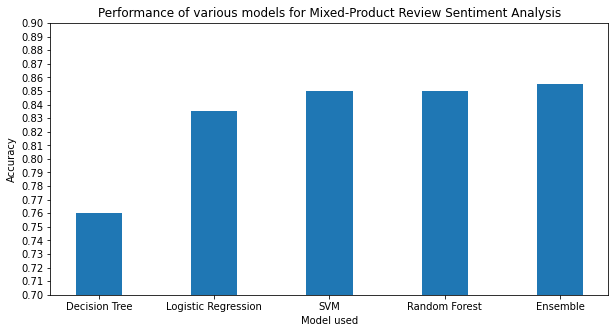

In [ ]:
import matplotlib.pyplot as plt
models = ["Decision Tree","Logistic Regression","SVM","Random Forest","Ensemble"]
values = [dtacc,lracc,svmacc,rfacc,ensemacc]
fig = plt.figure(figsize = (10, 5))

plt.bar(models,values,width = 0.4)
plt.yticks([0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90])
plt.ylim([0.70,0.90])
plt.xlabel("Model used")
plt.ylabel("Accuracy")
plt.title("Performance of various models for Mixed-Product Review Sentiment Analysis")
plt.show()